Introduction

Many people know the city of San Francisco, but this glory is rather sad: next to the city there is Alcatraz Island, where there was a maximum security federal prison and where some of the most famous criminals in the world lived. This prison was often called the Rock, since for a long time Alcatraz was considered the most reliable prison in America.

Today, Alcatraz is a public museum and one of San Francisco's top tourist attractions, attracting approximately 1.5 million visitors annually. The former prison, now operated by the US National Park Service, is being restored and maintained.

At the moment, crime in San Francisco is lower than in the whole country, but despite the decline in violent crime, crimes against property still happen. Let's try to predict what kind of crimes can happen in this city.

In [ ]:
!unzip "/kaggle/input/sf-crime/test.csv.zip" -d data
!unzip "/kaggle/input/sf-crime/train.csv.zip" -d data
# Import the required libraries
import os
import numpy as np 
import pandas as pd 

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


Archive:  /kaggle/input/sf-crime/test.csv.zip
  inflating: data/test.csv           
Archive:  /kaggle/input/sf-crime/train.csv.zip
  inflating: data/train.csv          


In [ ]:
# Import the necessary libraries so that you can build geographic maps:

!pip install geopandas
!pip uninstall Fiona==1.9 --yes
!pip install Fiona==1.8
import geopandas as gpd
from shapely.geometry import  Point
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(20,20))
from shapely import wkt
%matplotlib inline

Found existing installation: Fiona 1.8.22
Uninstalling Fiona-1.8.22:
  Successfully uninstalled Fiona-1.8.22
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 53.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
flask 2.2.3 requires click>=8.0, but you have click 7.1.2 which is incompatible.
distributed 2021.11.2 requires dask==2021.11.2, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.12.2 requires dask<=2021.11.2,>=2021.11.1, but you have dask 2022.2.0 which is incompatible.


In [ ]:
# Test sample file

df_test = pd.read_csv("/kaggle/input/sf-crime/test.csv.zip", parse_dates=['Dates'])
df_test.head()

Id               Dates DayOfWeek PdDistrict                   Address  \
0   0 2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1 2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2 2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4 2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          884262 non-null  int64         
 1   Dates       884262 non-null  datetime64[ns]
 2   DayOfWeek   884262 non-null  object        
 3   PdDistrict  884262 non-null  object        
 4   Address     884262 non-null  object        
 5   X           884262 non-null  float64       
 6   Y           884262 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 47.2+ MB


In [ ]:
# Training set

df_train = pd.read_csv("/kaggle/input/sf-crime/train.csv.zip", parse_dates=['Dates'])
df_train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [ ]:
# Let's see for what period we have data on crimes:

print(f"first date covert: {df_train.Dates.sort_values().min()}")
print(f"last date: {df_train.Dates.sort_values().max()}")
df_train.shape

first date covert: 2003-01-06 00:01:00
last date: 2015-05-13 23:53:00


(878049, 9)

Our database contains data on crimes for 12 years, from January 2003 to May 2015, respectively, there is a lot of data - 878049 rows, while we have 9 different column signs.

The value of the columns of our dataset:

Dates - the date of the crime

Category - the category of the crime occurrence. (This is our target variable.)

Descript - a detailed description of the crime

DayOfWeek - day of the week

PdDistrict - the name of the police department's district

Resolusion - how the incident ended (punishment)

Address - approximate address of the crime scene

X - longitude

Y - latitude

In [ ]:
df_train.describe().T

count        mean       std         min         25%         50%  \
X  878049.0 -122.422616  0.030354 -122.513642 -122.432952 -122.416420   
Y  878049.0   37.771020  0.456893   37.707879   37.752427   37.775421   

          75%    max  
X -122.406959 -120.5  
Y   37.784369   90.0

There are only two numeric features in the data - latitude and longitude. Longitude does not raise questions: the minimum and maximum values ​​are almost the same, the difference is explained by the length of the city, but there are obvious problems with latitude: the minimum latitude is 37.7, and the maximum is 90.0. Let's see how all the given coordinates are located in space:

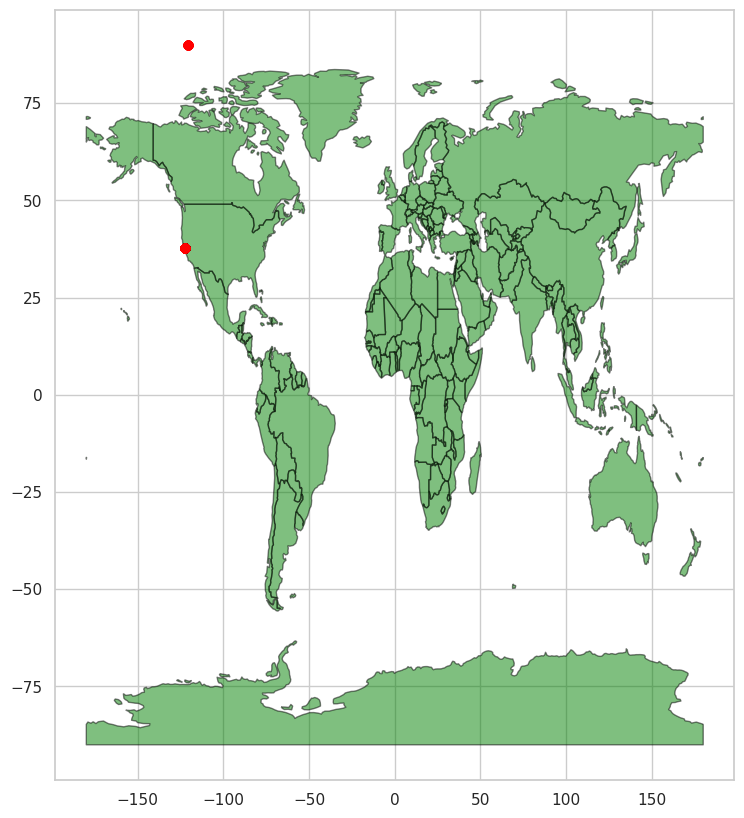

In [ ]:
# Mark the points on the map (by latitude and longitude from the data) where exactly the crimes were committed:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(df_train)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(14,10), color='green', edgecolor='black', alpha=0.5)

train_gdf.plot(ax=ax, color='red')
plt.show()

All coordinates from the dataset are grouped into two red dots on the map. The lower group of points is located in the San Francisco area, and the upper group of points does not fall on land on the map, it seems that this is some kind of extra or incorrect data. Let's see how many points got there (we see that the points lie above the longitude of 50.0):All coordinates from the dataset are grouped into two red dots on the map. The lower group of points is located in the San Francisco area, and the upper group of points does not fall on land on the map, it seems that this is some kind of extra or incorrect data. Let's see how many points got there (we see that the points lie above the longitude of 50.0):

In [ ]:
print(train_gdf.loc[train_gdf.Y > 50].count()[0])
train_gdf.loc[train_gdf.Y > 50].sample(5)

67


Dates         Category                         Descript  \
842434 2003-06-24 18:35:00  STOLEN PROPERTY        RECEIVING STOLEN PROPERTY   
788575 2004-03-17 01:16:00   OTHER OFFENSES  MISCELLANEOUS STATE MISDEMEANOR   
677036 2005-10-07 08:35:00     NON-CRIMINAL                   FOUND PROPERTY   
759397 2004-08-03 19:30:00    LARCENY/THEFT     GRAND THEFT FROM LOCKED AUTO   
842259 2003-06-25 07:30:00    VEHICLE THEFT                STOLEN AUTOMOBILE   

        DayOfWeek  PdDistrict      Resolution  \
842434    Tuesday    NORTHERN  ARREST, BOOKED   
788575  Wednesday    NORTHERN  ARREST, BOOKED   
677036     Friday  TENDERLOIN       UNFOUNDED   
759397    Tuesday    NORTHERN            NONE   
842259  Wednesday    RICHMOND            NONE   

                                             Address      X     Y  \
842434                         AUSTIN ST / LARKIN ST -120.5  90.0   
788575                         LARKIN ST / AUSTIN ST -120.5  90.0   
677036                 7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
759397                         LARKIN ST / AUSTIN ST -120.5  90.0   
842259  JOHN F KENNEDY DR / MARTIN LUTHER KING JR DR -120.5  90.0   

                        Coordinates  
842434  POINT (-120.50000 90.00000)  
788575  POINT (-120.50000 90.00000)  
677036  POINT (-120.50000 90.00000)  
759397  POINT (-120.50000 90.00000)  
842259  POINT (-120.50000 90.00000)

In [ ]:
# Let's see if there are such violations in the test set:

print(df_test.loc[df_test.Y > 50].count()[0])
df_test.loc[df_test.Y > 50].sample(3)

76


Id               Dates DayOfWeek PdDistrict  \
683968  683968 2005-09-04 23:30:00    Sunday   NORTHERN   
836254  836254 2003-08-16 17:30:00  Saturday   SOUTHERN   
798941  798941 2004-02-14 21:10:00  Saturday   RICHMOND   

                                    Address      X     Y  
683968                AUSTIN ST / LARKIN ST -120.5  90.0  
836254  SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  
798941     JOHN F KENNEDY DR / CROSSOVER DR -120.5  90.0

There are 67 such points in the train, and there are even more of them in the test - 76 positions, all these outliers have the same coordinates x=-120.5, y=90.0. Longitude -120.5 corresponds to the longitude of the city of San Francisco, and latitude 90.0 is somewhere at the North Pole, which confirms the idea of erroneous data in the coordinates.There are 67 such points in the train, and there are even more of them in the test - 76 positions, all these outliers have the same coordinates x=-120.5, y=90.0. Longitude -120.5 corresponds to the longitude of the city of San Francisco, and latitude 90.0 is somewhere at the North Pole, which confirms the idea of erroneous data in the coordinates.

In [ ]:
# Are there any duplicates in our training set?

df_train.duplicated().sum()

2323

In [ ]:
# Remove duplicates and lines with erroneous coordinates:

df_train.drop_duplicates(inplace=True)
df_train = df_train.drop(df_train[(df_train.Y > 50)].index)
df_train.shape

(875659, 9)

In [ ]:
# Just in case, check that there are no duplicates in the test set:

df_test.duplicated().sum()

0

Lines with coordinates at the North Pole can be deleted - this is only 67 lines out of almost 900 thousand objects, and in the test sample - 76 lines, again, out of almost 900 thousand lines. Preliminary attempts to enter the correct coordinates did not lead to a good result, because. looking at the coordinates for a specific area of Tenderloin from the dataset, we found that in these 67 lines the error is not only in longitude, but also in latitude. The idea to restore the coordinates of the address from the existing database did not work, and from the map of San Francisco, too. Too time-consuming task, so it's easier to remove these lines altogether.

In [ ]:
# Sort data from a common file with a specific area and address

train_gdf.loc[(train_gdf.PdDistrict == 'TENDERLOIN') & (train_gdf.Address == '7THSTNORTH ST / MCALLISTER ST')]

Dates        Category  \
677036 2005-10-07 08:35:00    NON-CRIMINAL   
678539 2005-10-03 18:46:00  OTHER OFFENSES   
678540 2005-10-03 18:46:00    NON-CRIMINAL   

                                  Descript DayOfWeek  PdDistrict  \
677036                      FOUND PROPERTY    Friday  TENDERLOIN   
678539  VIOLATION OF MUNICIPAL POLICE CODE    Monday  TENDERLOIN   
678540         PROPERTY FOR IDENTIFICATION    Monday  TENDERLOIN   

           Resolution                        Address      X     Y  \
677036      UNFOUNDED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
678539  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
678540  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   

                        Coordinates  
677036  POINT (-120.50000 90.00000)  
678539  POINT (-120.50000 90.00000)  
678540  POINT (-120.50000 90.00000)

In [ ]:
# Sort data from a file in 67 lines by specific areas and addresses

train_gdf.loc[(train_gdf.Y > 50)].sort_values(['PdDistrict','Address']).sample(5)

Dates               Category  \
669946 2005-11-14 09:20:00         OTHER OFFENSES   
673114 2005-10-23 18:11:00               WARRANTS   
852880 2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
687519 2005-08-13 17:00:00          VEHICLE THEFT   
692258 2005-07-25 08:10:00          LARCENY/THEFT   

                                     Descript DayOfWeek  PdDistrict  \
669946  DRIVERS LICENSE, SUSPENDED OR REVOKED    Monday     BAYVIEW   
673114        ENROUTE TO OUTSIDE JURISDICTION    Sunday     TARAVAL   
852880            FORCIBLE RAPE, BODILY FORCE    Friday    SOUTHERN   
687519                      STOLEN AUTOMOBILE  Saturday  TENDERLOIN   
692258           GRAND THEFT FROM LOCKED AUTO    Monday    RICHMOND   

                              Resolution                         Address  \
669946                    ARREST, BOOKED       YOSEMITE AV / WILLIAMS AV   
673114                    ARREST, BOOKED          STCHARLES AV / 19TH AV   
852880  COMPLAINANT REFUSES TO PROSECUTE  3RD ST / JAMES LICK FREEWAY HY   
687519                              NONE        JENNINGS CT / INGALLS ST   
692258                              NONE     ARGUELLO BL / NORTHRIDGE DR   

            X     Y                  Coordinates  
669946 -120.5  90.0  POINT (-120.50000 90.00000)  
673114 -120.5  90.0  POINT (-120.50000 90.00000)  
852880 -120.5  90.0  POINT (-120.50000 90.00000)  
687519 -120.5  90.0  POINT (-120.50000 90.00000)  
692258 -120.5  90.0  POINT (-120.50000 90.00000)

In [ ]:
# Let's see how many crimes per day were committed in San Francisco:

df_train['Date'] = df_train.Dates.dt.date   # I select the date column from the data 
#(initially I had to transfer the data from this column from object to datetime64)
data = df_train.groupby('Date').count().iloc[:, 0]
data.describe()

count    2249.000000
mean      389.354824
std        48.506406
min         2.000000
25%       360.000000
50%       389.000000
75%       420.000000
max       650.000000
Name: Dates, dtype: float64

During this period, there were approximately 389 crimes per day in San Francisco, a standard deviation of 48, no obvious deviations in the data are visible. Let's look at this data clearly:

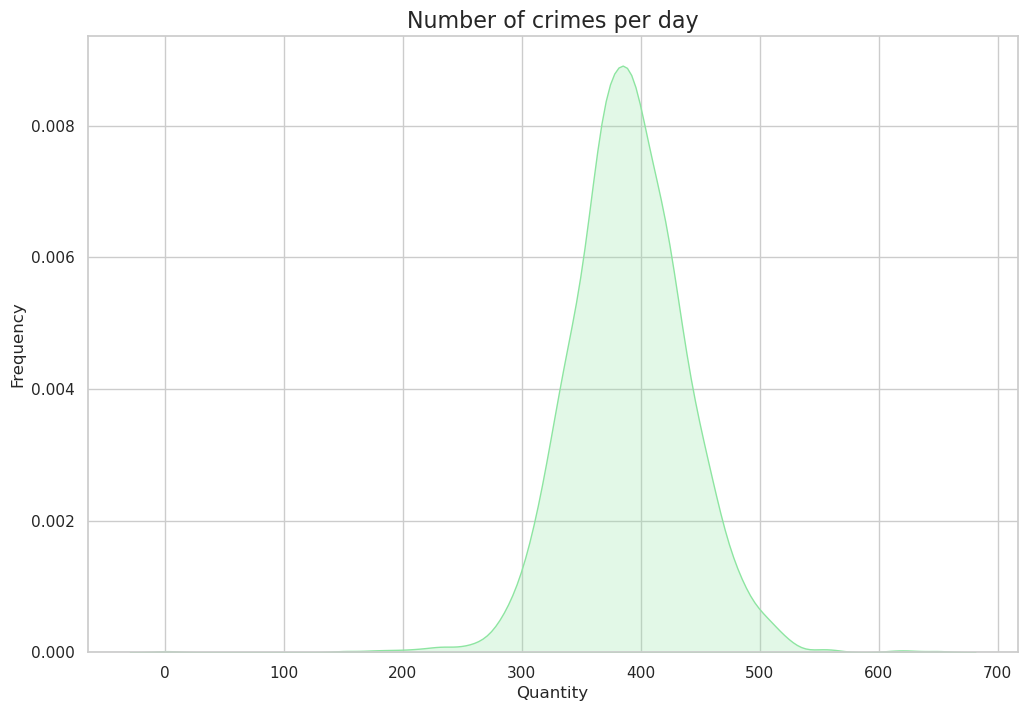

In [ ]:
# On the graph we see the normal distribution:

col = sns.color_palette()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, shade=True, color='g')

plt.title('Number of crimes per day', fontdict={'fontsize': 16})
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

Crimes are committed on all days of the week (from Monday to Sunday), let's look at the data from this point of view

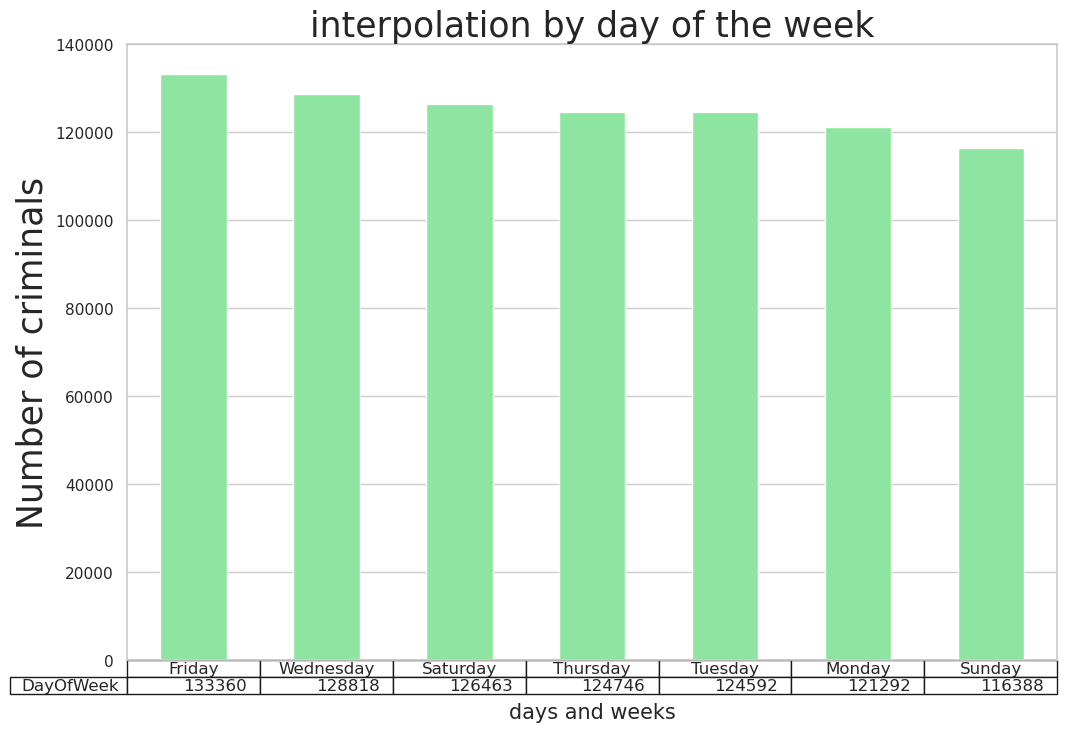

count         7.000000
mean     125094.142857
std        5395.860155
min      116388.000000
25%      122942.000000
50%      124746.000000
75%      127640.500000
max      133360.000000
Name: DayOfWeek, dtype: float64

In [ ]:
# Let's group the data by days of the week and see how they look on the chart:

week = df_train['DayOfWeek'].value_counts()
week.plot(kind="bar",figsize=(12,8), table=True,  color='g')

plt.xticks([])
plt.xlabel('days and weeks',fontsize=15,labelpad=30)
plt.ylabel('Number of criminals',fontsize=25)
plt.title('interpolation by day of the week',fontsize=25)
plt.show()

week.describe()

The graph shows that most crimes were committed on Fridays, and the quietest day is Sunday, however, on average, the number of crimes is approximately the same on the days of the week.

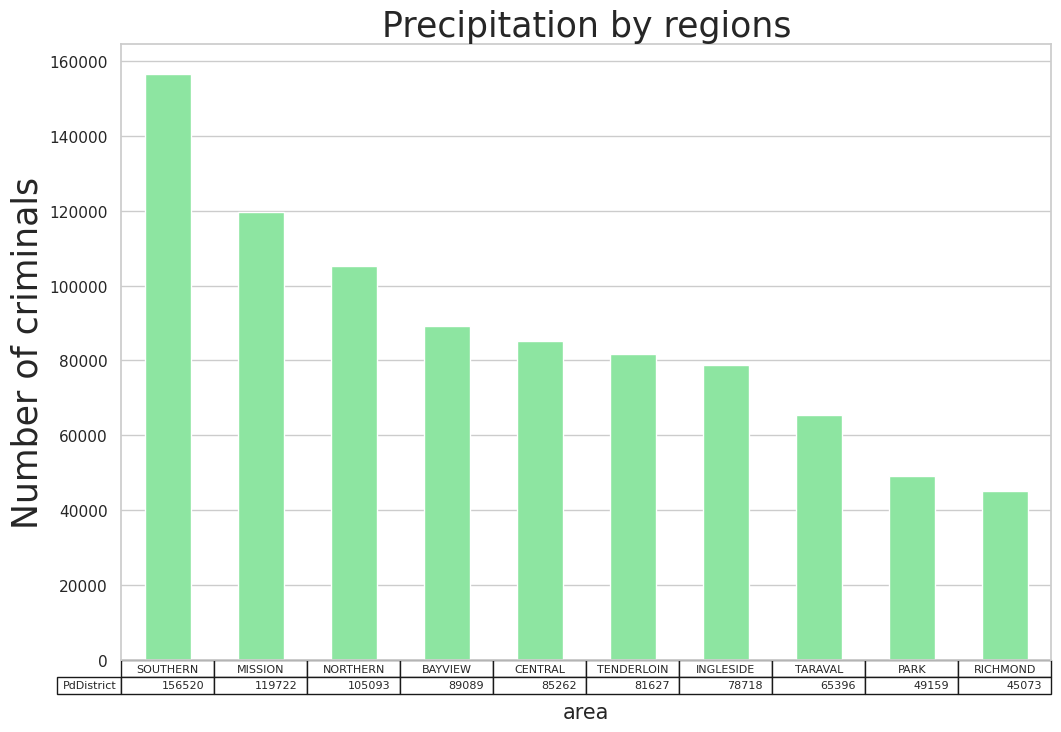

count        10.000000
mean      87565.900000
std       33315.506148
min       45073.000000
25%       68726.500000
50%       83444.500000
75%      101092.000000
max      156520.000000
Name: PdDistrict, dtype: float64

In [ ]:
# Estimate the number of crimes by district

dist = df_train["PdDistrict"].value_counts()
dist.plot(kind="bar",figsize=(12,8), table=True,  color='g')

plt.xticks([])
plt.xlabel('area',fontsize=15,labelpad=30)
plt.ylabel('Number of criminals',fontsize=25)
plt.title('Precipitation by regions',fontsize=25)
plt.show()

dist.describe()

The most hectic district is Southern, the calmest is Richmond, the spread of crimes by district is quite large: 33316 from the average of 87565.

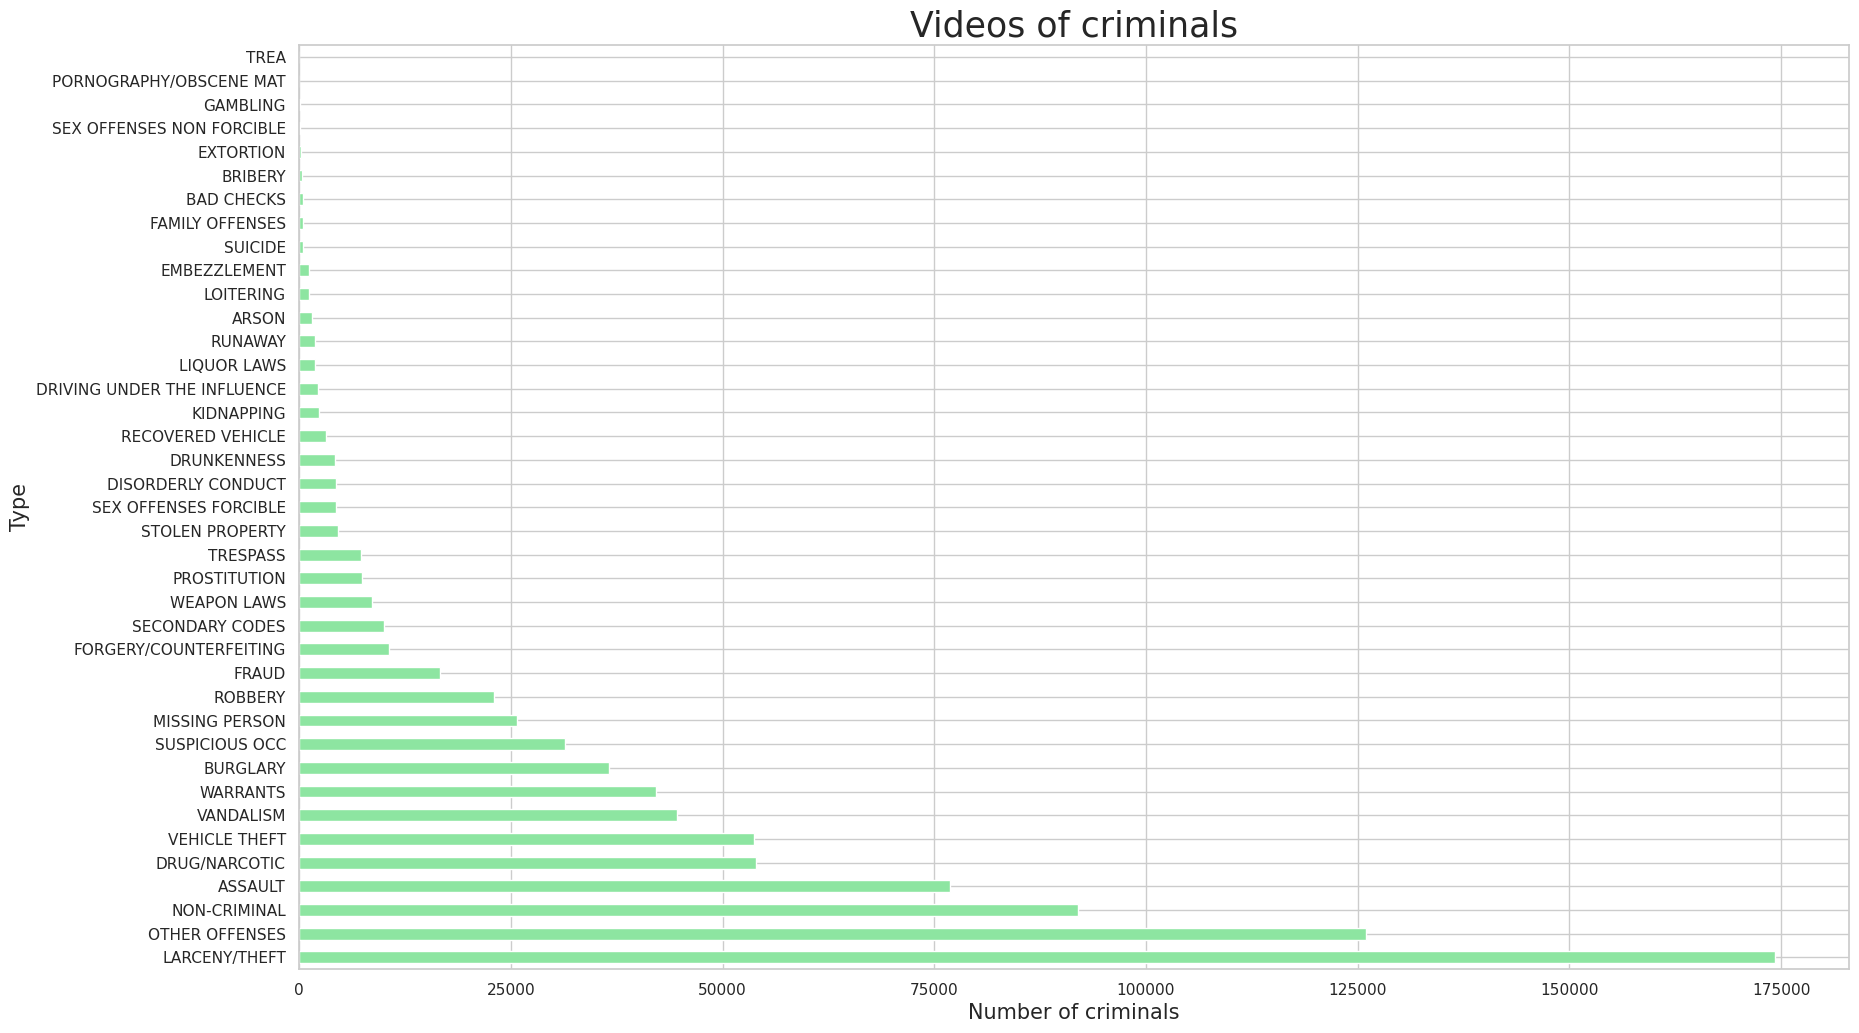

In [ ]:
# Let's estimate which crimes most often occur in San Francisco:

kind = df_train['Category'].value_counts()

kind.plot(kind="barh",figsize=(20,12),  color='g')

plt.ylabel('Type',fontsize=15)
plt.xlabel('Number of criminals',fontsize=15)
plt.title('Videos of criminals',fontsize=25)
plt.show()

In [ ]:
kind.describe()

count        39.000000
mean      22452.794872
std       37967.112752
min           6.000000
25%        1185.500000
50%        4379.000000
75%       28530.500000
max      174305.000000
Name: Category, dtype: float64

In [ ]:
# On the graph by type of crime, we see in descending order:

kind

LARCENY/THEFT                  174305
OTHER OFFENSES                 125943
NON-CRIMINAL                    91911
ASSAULT                         76811
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53697
VANDALISM                       44580
WARRANTS                        42137
BURGLARY                        36599
SUSPICIOUS OCC                  31392
MISSING PERSON                  25669
ROBBERY                         22987
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7317
STOLEN PROPERTY                  4536
SEX OFFENSES FORCIBLE            4379
DISORDERLY CONDUCT               4311
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

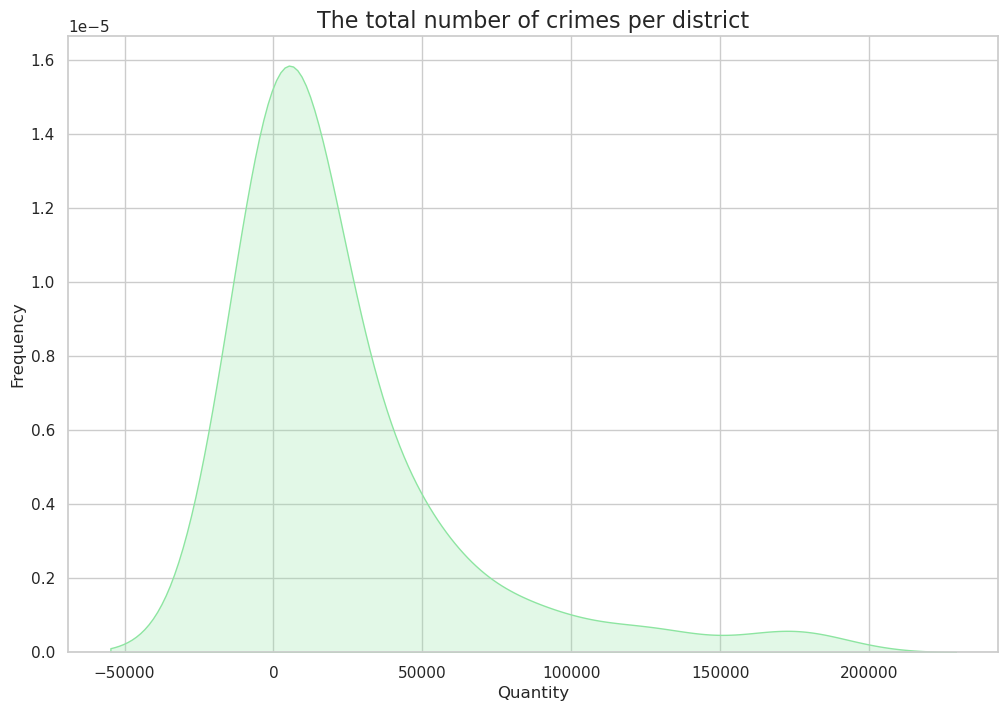

In [ ]:
# Let's see how the number of crimes by district looks like on the graph:

plt.figure(figsize=(12, 8))
sns.kdeplot(data=kind, shade=True, color='g')

plt.title('The total number of crimes per district', fontdict={'fontsize': 16})
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

We have 39 different types of crimes that have been committed over 12 years, with a very large scatter of data, and a strong bias. At the same time, in the Descript column, we see much more decoding options, namely 879 values, by which it will be quite difficult to predict the type of crime, so we will focus on predicting a crime by those 39 types that are in the Category column.

Further in the course of work, it was decided to remove this feature

In [ ]:
df_train.Descript.describe()

count                           875659
unique                             879
top       GRAND THEFT FROM LOCKED AUTO
freq                             59756
Name: Descript, dtype: object

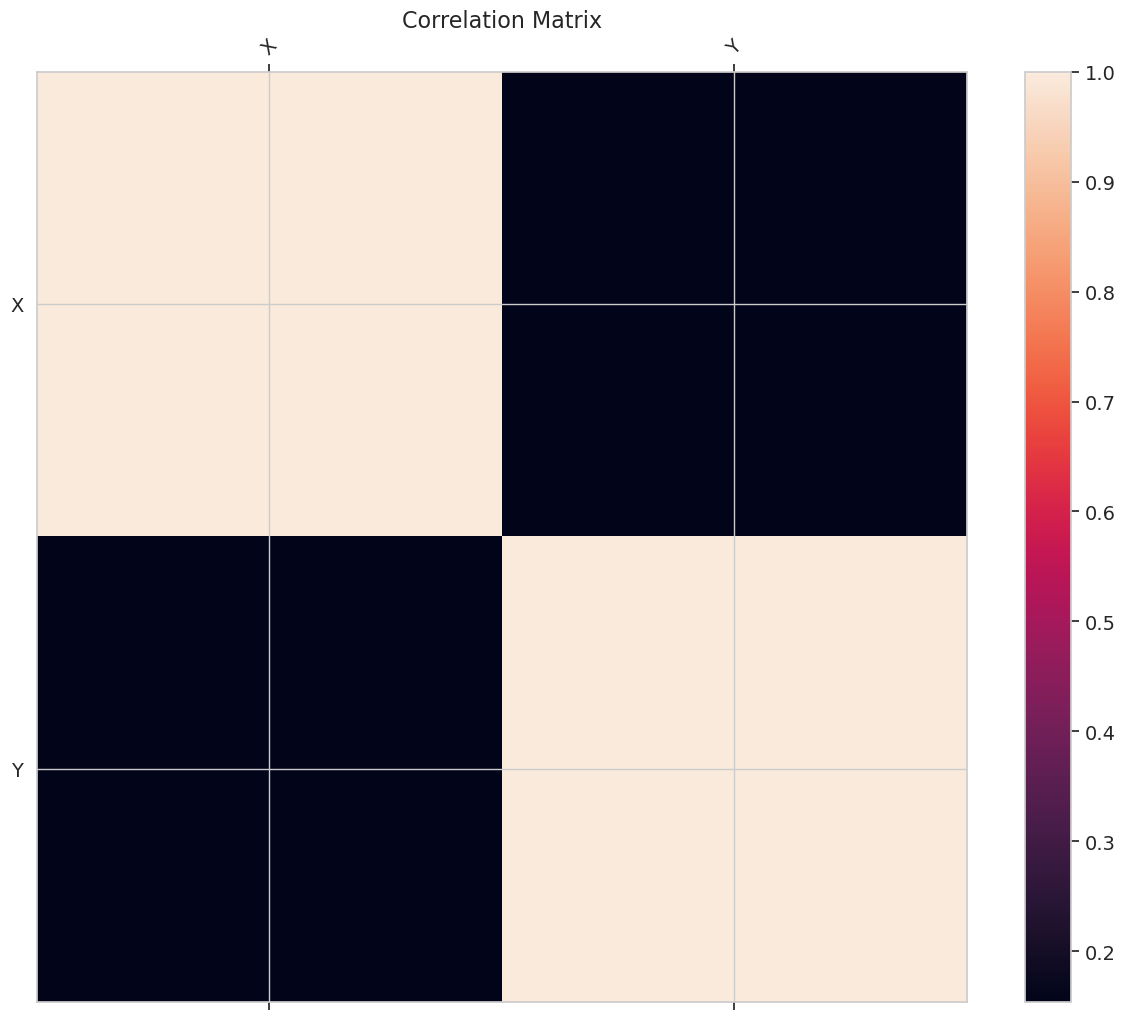

In [ ]:
# Let's look at the correlation of our initial features:

f = plt.figure(figsize=(15, 12))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Since initially we have only two numerical signs, namely latitude and longitude, the correlation matrix does not give us any additional thoughts for analysis.

Using the pairplot function of the seaborn library, we will plot graphs for each pair of numerical features (we specify the 'Category' column as the colors of the points)

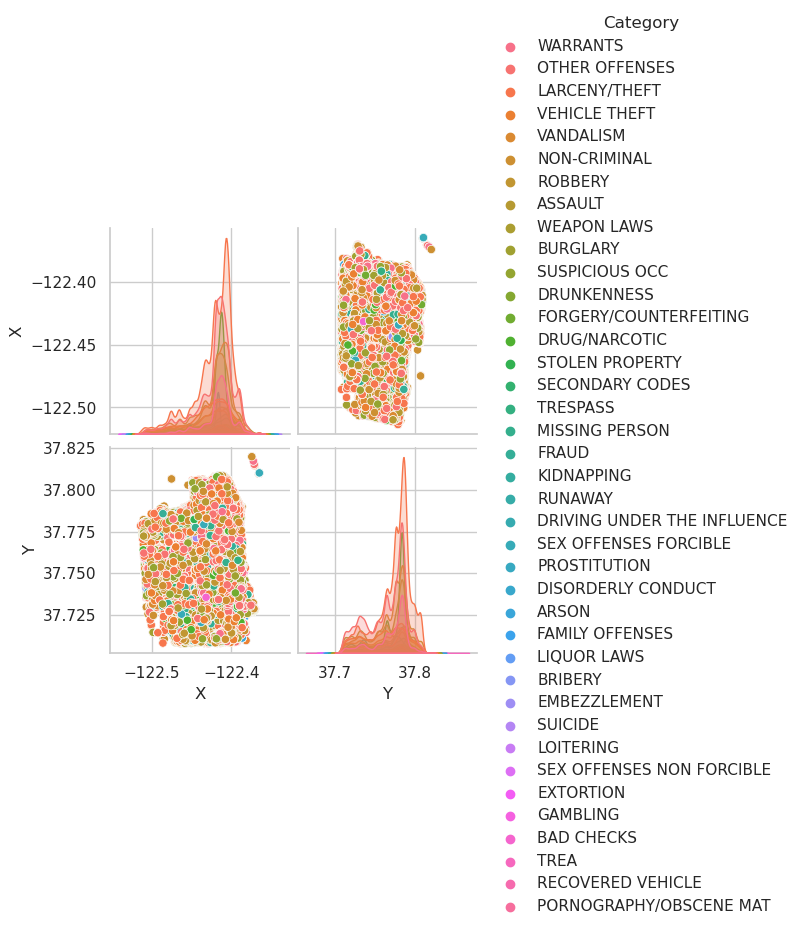

In [ ]:
sns.pairplot(df_train, hue='Category')

!pip install contextily
import contextily as ctx

In [ ]:
train_gdf.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y                  Coordinates  
0 -122.425892  37.774599  POINT (-122.42589 37.77460)  
1 -122.425892  37.774599  POINT (-122.42589 37.77460)  
2 -122.424363  37.800414  POINT (-122.42436 37.80041)  
3 -122.426995  37.800873  POINT (-122.42700 37.80087)  
4 -122.438738  37.771541  POINT (-122.43874 37.77154)

In [ ]:
# Add coordinates to the main file:

geometry2 = [Point(xy) for xy in zip(df_train['X'], df_train['Y'])]

In [ ]:
# Load the San Francisco shapefile to mark the crime scene locations
# on the city map

! wget https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip -q

In [ ]:
# Unpack the files for use

!unzip "./tl_2017_06075_roads.zip" -d shapefiles

Archive:  ./tl_2017_06075_roads.zip
 extracting: shapefiles/tl_2017_06075_roads.cpg  
  inflating: shapefiles/tl_2017_06075_roads.dbf  
  inflating: shapefiles/tl_2017_06075_roads.prj  
  inflating: shapefiles/tl_2017_06075_roads.shp  
  inflating: shapefiles/tl_2017_06075_roads.shp.ea.iso.xml  
  inflating: shapefiles/tl_2017_06075_roads.shp.iso.xml  
  inflating: shapefiles/tl_2017_06075_roads.shp.xml  
  inflating: shapefiles/tl_2017_06075_roads.shx  


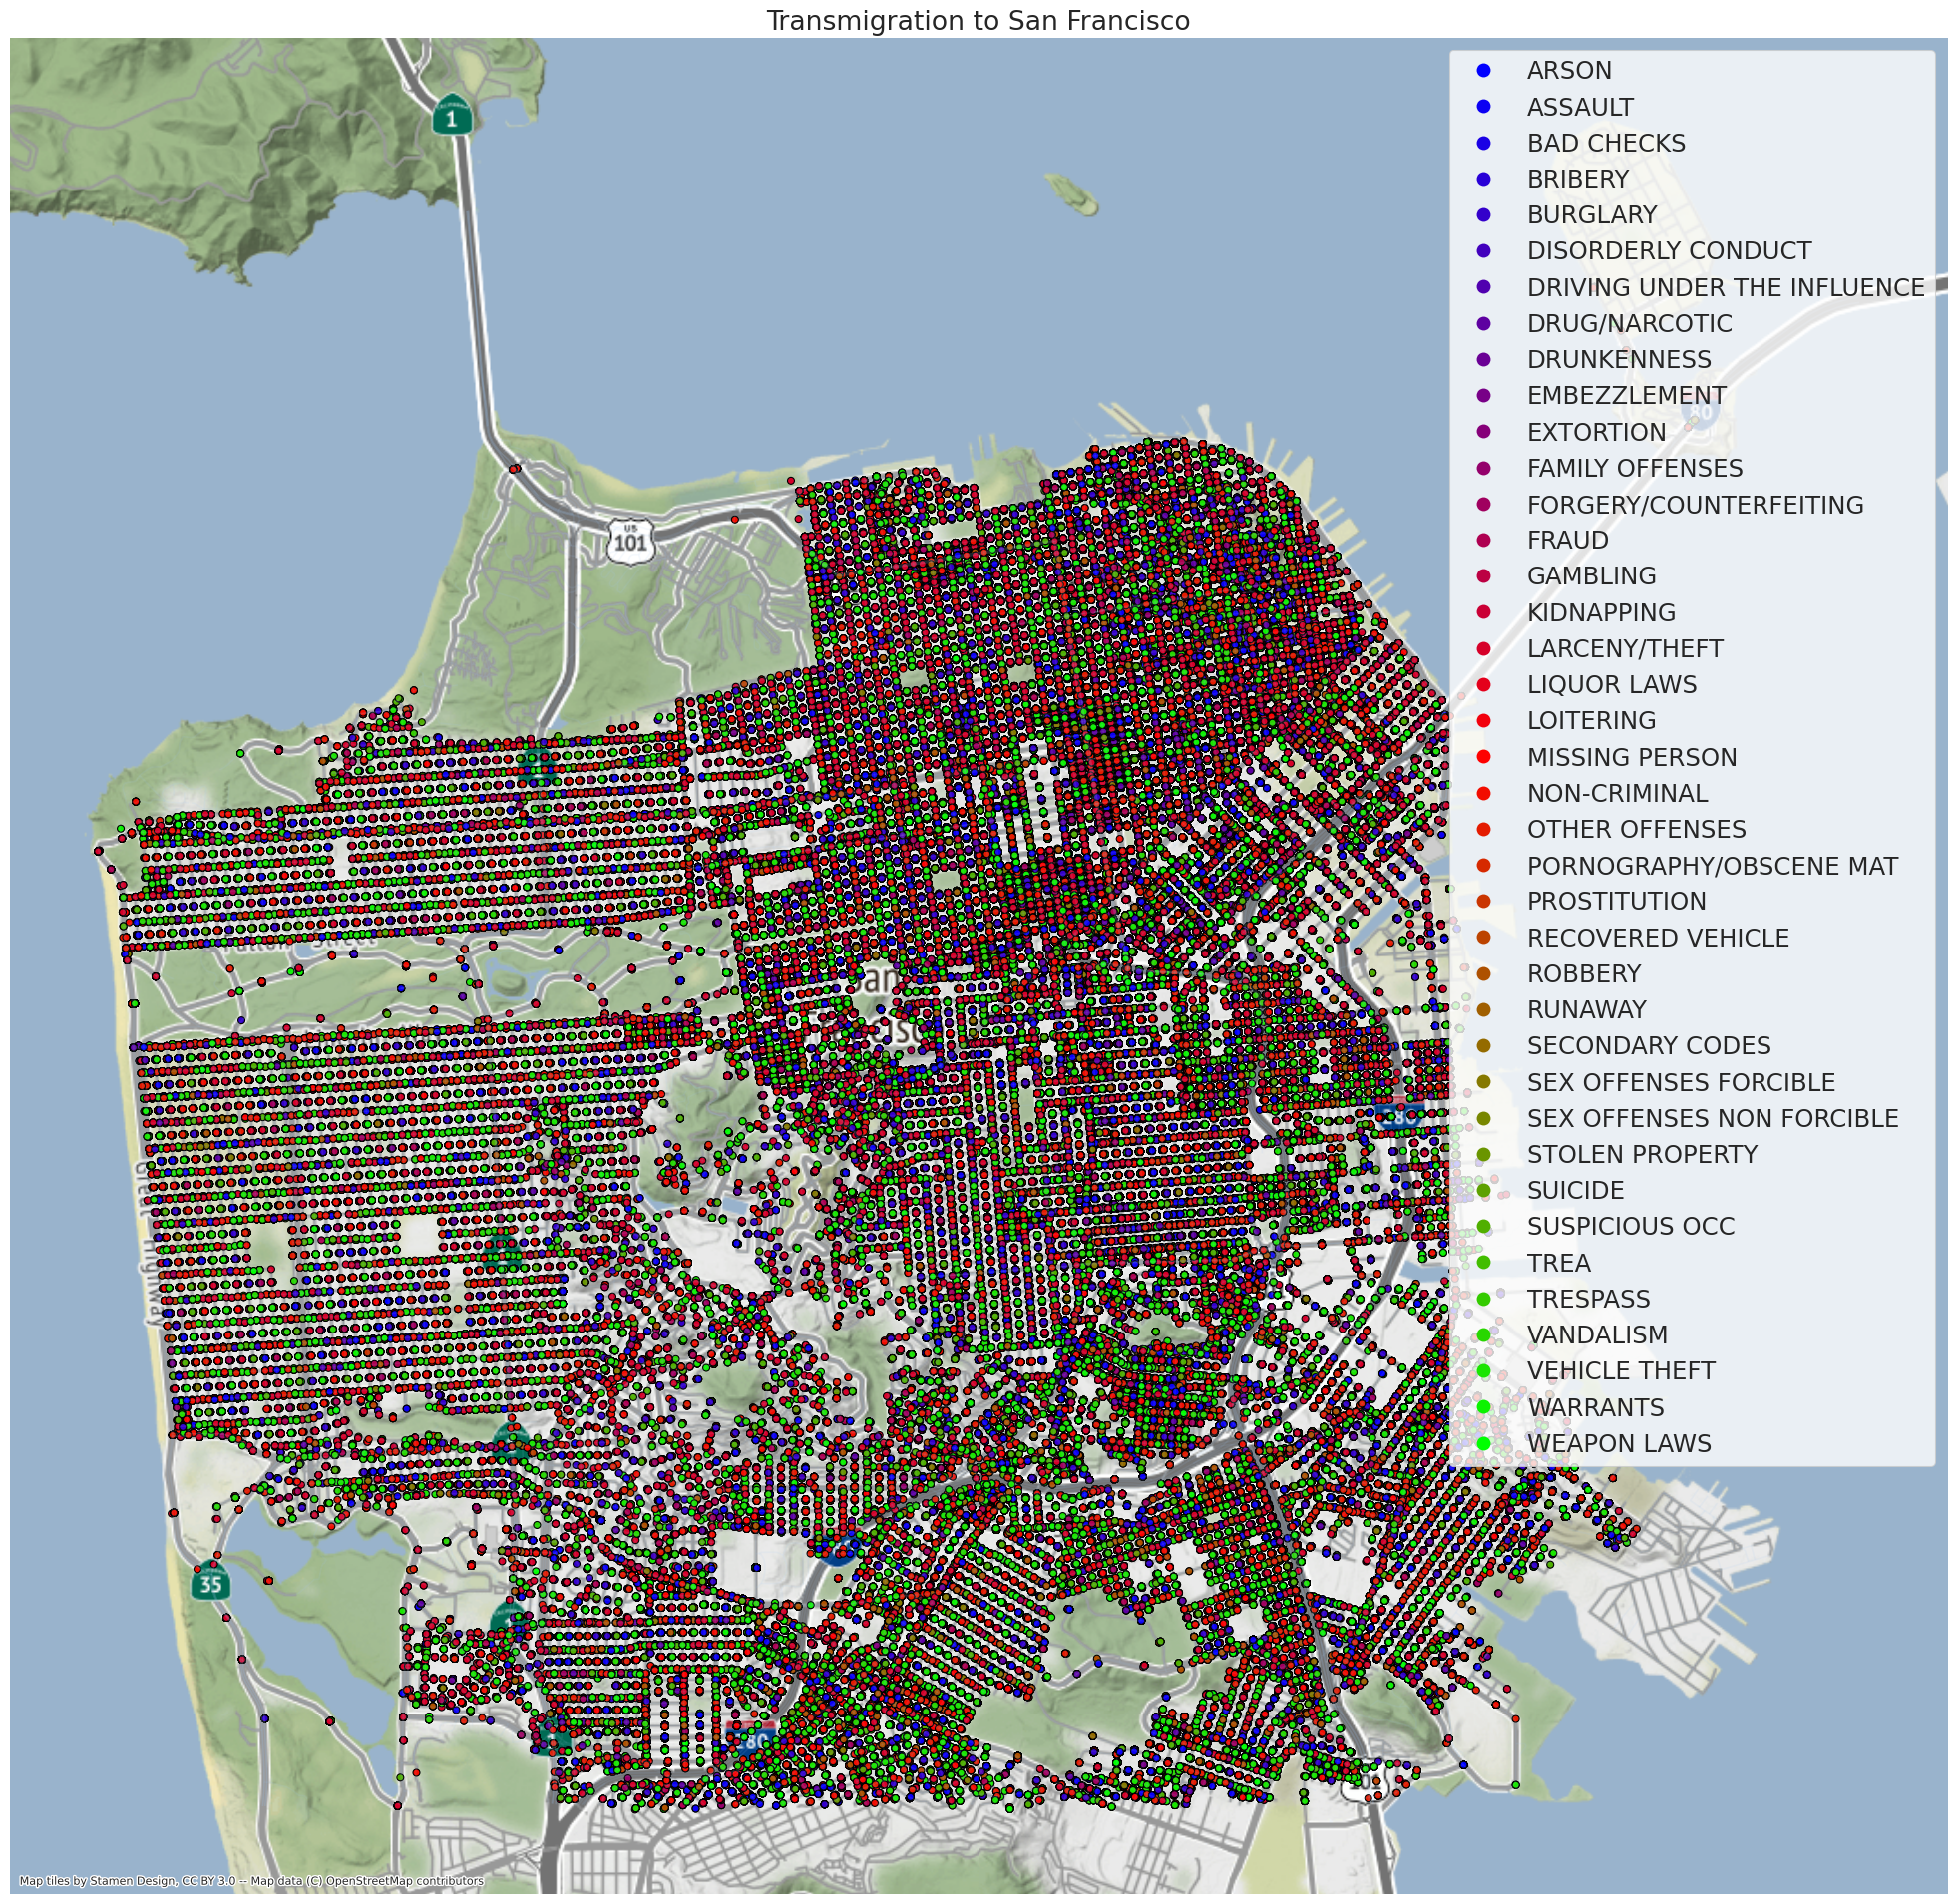

In [ ]:
# Convert shapefile to GeoDataFrame

geo_df = gpd.read_file('shapefiles/tl_2017_06075_roads.shp')
geo_df = geo_df.to_crs(epsg=3857)

# Convert Pandas DataFrame to GeoDataFrame

crime_geo_df = gpd.GeoDataFrame(df_train, geometry=geometry2)

# Initialize the crs coordinate system to 4326, projection onto the ellipsoid,
# because in this format data is presented in geometry

crime_geo_df.crs = "EPSG:4326"

# Change crs to Mercator to match coordinate encoding
#San Francisco GeoDataFrame

crime_geo_df = crime_geo_df.to_crs(epsg = 3857)

# Map output optimization setting

sns.set_context("paper", font_scale=2)

# Create a map

fig, ax = plt.subplots(figsize=(20,20))

# Apply our SF GeoDataFrame layer

geo_df.plot(ax=ax, alpha = .1)

# Draw points of crimes

crime_geo_df.plot(ax=ax, column = 'Category', cmap = 'brg', marker = '.', \
                  markersize=100, edgecolor = 'black', alpha=1, legend = True)  

# Add terrain and features to the map using contextily

ctx.add_basemap(ax, )

# Disable axes with coordinates in Mercator format
# (projected onto a cylinder, axis = earth axis)

ax.set_axis_off()

fig.tight_layout()
plt.title("Transmigration to San Francisco")
plt.savefig('SF_crime_areas.png');

We see that in fact crimes happen in all the districts of the city.

In [ ]:
# Visual breakdown of categories of crimes by their number TOP-10 categories:

import plotly.express as px
cats = df_train["Category"].value_counts()[:10]
cats['OTHER 29 pos'] = df_train["Category"].value_counts()[11:].sum()
label = cats[0]
cats = pd.DataFrame(cats).reset_index()
cats.rename(columns={'index': 'Category', 'Category': 'Count'}, inplace=True)
cats.index += 1
label = cats['Category']
fig = px.pie(names=label, values=cats['Count'], height=600, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=12, )
fig.update_layout(title_text = 'TOP-10 Category of criminals', 
                  title_font = dict(size=20, family='Verdana', color='black'))
fig.show()

In [ ]:
df_train['Hour'] = df_train.Dates.dt.hour   # I select the date column from the data 
#(initially I had to transfer the data from this column from object to datetime64)

In [ ]:
# We can estimate how many crimes happened in certain periods of time, for example from 20 to 23:
df_train.loc[(df_train.Hour >= 20) & (df_train.Hour <= 23)].count()

Dates         176082
Category      176082
Descript      176082
DayOfWeek     176082
PdDistrict    176082
Resolution    176082
Address       176082
X             176082
Y             176082
Date          176082
geometry      176082
Hour          176082
dtype: int64

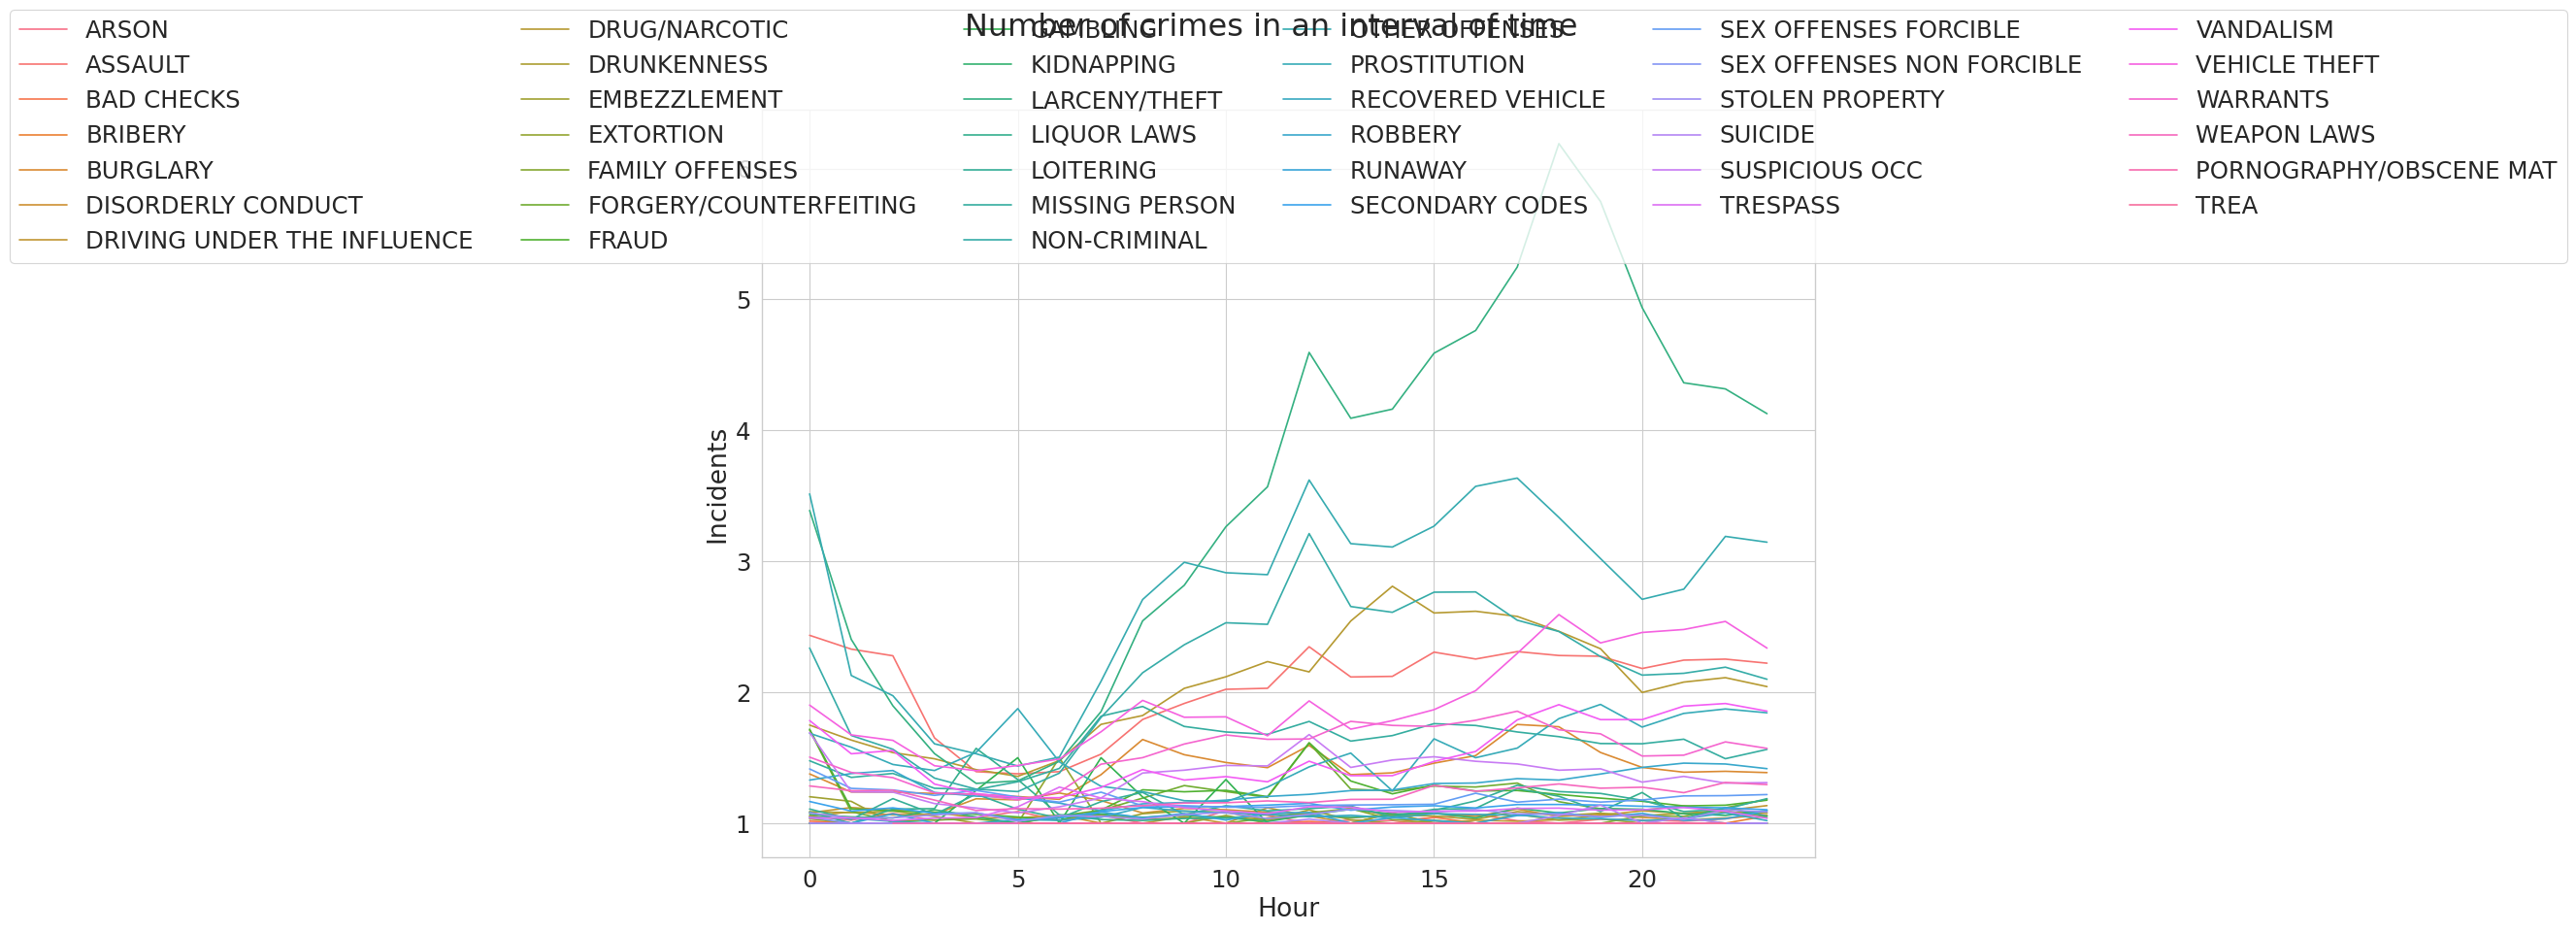

In [ ]:
# Let's see how many crimes in different categories occur in different periods of time:
data = df_train.groupby(['Hour', 'Date', 'Category'],
                     as_index=False).count().iloc[:, :4]
data.rename(columns={'Dates': 'Inсidents'}, inplace=True)
data = data.groupby(['Hour', 'Category'], as_index=False).mean()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.lineplot(x='Hour', y='Inсidents', data=data, hue='Category')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.suptitle('Number of crimes in an interval of time')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

It is clear that the number of crimes varies not only depending on the time of day, but also on the type of crimes. The smallest number of all crimes occurs in the morning, in the interval from 3 to 6 in the morning, but at the same time, crimes such as prostitution are at their peak at this time. Burglaries as leaders are most active from 15:00 to 20:00. Most crimes occur between 10 am and 8 pm.

Conclusions:
There is enough data in the database to make a prediction. All the signs turned out to be important, because. to predict a crime, we need to predict its type and the place where it can happen. An exception is possible for the Resolution column, since we do not care what kind of punishment it will be, so we should consider whether to remove this feature. The second column to remove is Descript, because this is a more detailed description of our target column, namely Category.

Let's introduce the Holiday feature as an additional feature. We will be able to sort this data from the data presented, based on the US holiday calendar. It is clear that the type of crime depends on the place, time and day of the week, so let's try to work with the date separately.

Let's try to estimate what kind of crimes can occur. In our case, we are talking about a multi-class classification, we need to predict one of 39 possible options.

To begin with, let's see what is the average frequency of one or another species among all, and take these results as basic predictions.

In [ ]:
average_frequency = (df_train.groupby('Category').count())/(df_train.shape[0])
average_frequency.Dates

Category
ARSON                          0.001727
ASSAULT                        0.087718
BAD CHECKS                     0.000464
BRIBERY                        0.000330
BURGLARY                       0.041796
DISORDERLY CONDUCT             0.004923
DRIVING UNDER THE INFLUENCE    0.002590
DRUG/NARCOTIC                  0.061575
DRUNKENNESS                    0.004884
EMBEZZLEMENT                   0.001329
EXTORTION                      0.000292
FAMILY OFFENSES                0.000557
FORGERY/COUNTERFEITING         0.012096
FRAUD                          0.018999
GAMBLING                       0.000167
KIDNAPPING                     0.002672
LARCENY/THEFT                  0.199056
LIQUOR LAWS                    0.002169
LOITERING                      0.001378
MISSING PERSON                 0.029314
NON-CRIMINAL                   0.104962
OTHER OFFENSES                 0.143827
PORNOGRAPHY/OBSCENE MAT        0.000025
PROSTITUTION                   0.008503
RECOVERED VEHICLE              

In [ ]:
# Average value over the entire set:

average_frequency.mean().mean()

0.02564102564102565

It turns out that we expect our prediction to be no worse than 2.56%, based on such simple calculations. We will expect that some learning models should show themselves better than this result.

In [ ]:
# Import the required libraries:

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss

In [ ]:
# Divided into dates, times, etc.

df_train['Date'] = df_train.Dates.dt.date 
df_train['Dау'] = df_train.Dates.dt.day
df_train['Month'] = df_train.Dates.dt.month
df_train['Year'] = df_train.Dates.dt.year
df_train.head(5)

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y        Date                     geometry  Hour  Dау  \
0 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
1 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
2 -122.424363  37.800414  2015-05-13  POINT (-122.42436 37.80041)    23   13   
3 -122.426995  37.800873  2015-05-13  POINT (-122.42700 37.80087)    23   13   
4 -122.438738  37.771541  2015-05-13  POINT (-122.43874 37.77154)    23   13   

   Month  Year  
0      5  2015  
1      5  2015  
2      5  2015  
3      5  2015  
4      5  2015

In [ ]:
# Select from these days that fell on holidays (according to the American calendar), 
# they are designated as True, and for other days (False):
dates = pd.to_datetime(df_train["Date"])
holidays = calendar().holidays(start=df_train["Date"].min(), end=df_train["Date"].max())
df_train["Holiday"] = dates.astype("datetime64").isin(holidays)
df_train.Holiday.value_counts()

False    850060
True      25599
Name: Holiday, dtype: int64

In [ ]:
# Encode categorical features:

le = LabelEncoder()
df_train["Category_Label"] = le.fit_transform(df_train["Category"])
df_train["DayOfWeek_Label"] = le.fit_transform(df_train["DayOfWeek"])
df_train["PdDistrict_Label"] = le.fit_transform(df_train["PdDistrict"])

df_train.head(5)

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y        Date                     geometry  Hour  Dау  \
0 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
1 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
2 -122.424363  37.800414  2015-05-13  POINT (-122.42436 37.80041)    23   13   
3 -122.426995  37.800873  2015-05-13  POINT (-122.42700 37.80087)    23   13   
4 -122.438738  37.771541  2015-05-13  POINT (-122.43874 37.77154)    23   13   

   Month  Year  Holiday  Category_Label  DayOfWeek_Label  PdDistrict_Label  
0      5  2015    False              37                6                 4  
1      5  2015    False              21                6                 4  
2      5  2015    False              21                6                 4  
3      5  2015    False              16                6                 4  
4      5  2015    False              16                6                 5

In [ ]:
df_train["Holiday_Label"] = le.fit_transform(df_train["Holiday"])
df_train.head(5)

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y        Date                     geometry  Hour  Dау  \
0 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
1 -122.425892  37.774599  2015-05-13  POINT (-122.42589 37.77460)    23   13   
2 -122.424363  37.800414  2015-05-13  POINT (-122.42436 37.80041)    23   13   
3 -122.426995  37.800873  2015-05-13  POINT (-122.42700 37.80087)    23   13   
4 -122.438738  37.771541  2015-05-13  POINT (-122.43874 37.77154)    23   13   

   Month  Year  Holiday  Category_Label  DayOfWeek_Label  PdDistrict_Label  \
0      5  2015    False              37                6                 4   
1      5  2015    False              21                6                 4   
2      5  2015    False              21                6                 4   
3      5  2015    False              16                6                 4   
4      5  2015    False              16                6                 5   

   Holiday_Label  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
# Remove categorical features and unnecessary columns for research:

df_train = df_train.drop(columns=["Dates", "Category", "Descript", "DayOfWeek", "PdDistrict","Resolution", "Address", "Date", "Holiday"])
df_train.dropna(inplace=True)

In [ ]:
# Delete the geometry column, we won't need it anymore

df_train = df_train.drop(columns=['geometry'])
df_train.head()

X          Y  Hour  Dау  Month  Year  Category_Label  \
0 -122.425892  37.774599    23   13      5  2015              37   
1 -122.425892  37.774599    23   13      5  2015              21   
2 -122.424363  37.800414    23   13      5  2015              21   
3 -122.426995  37.800873    23   13      5  2015              16   
4 -122.438738  37.771541    23   13      5  2015              16   

   DayOfWeek_Label  PdDistrict_Label  Holiday_Label  
0                6                 4              0  
1                6                 4              0  
2                6                 4              0  
3                6                 4              0  
4                6                 5              0

In [ ]:
df_train.shape

(875659, 10)

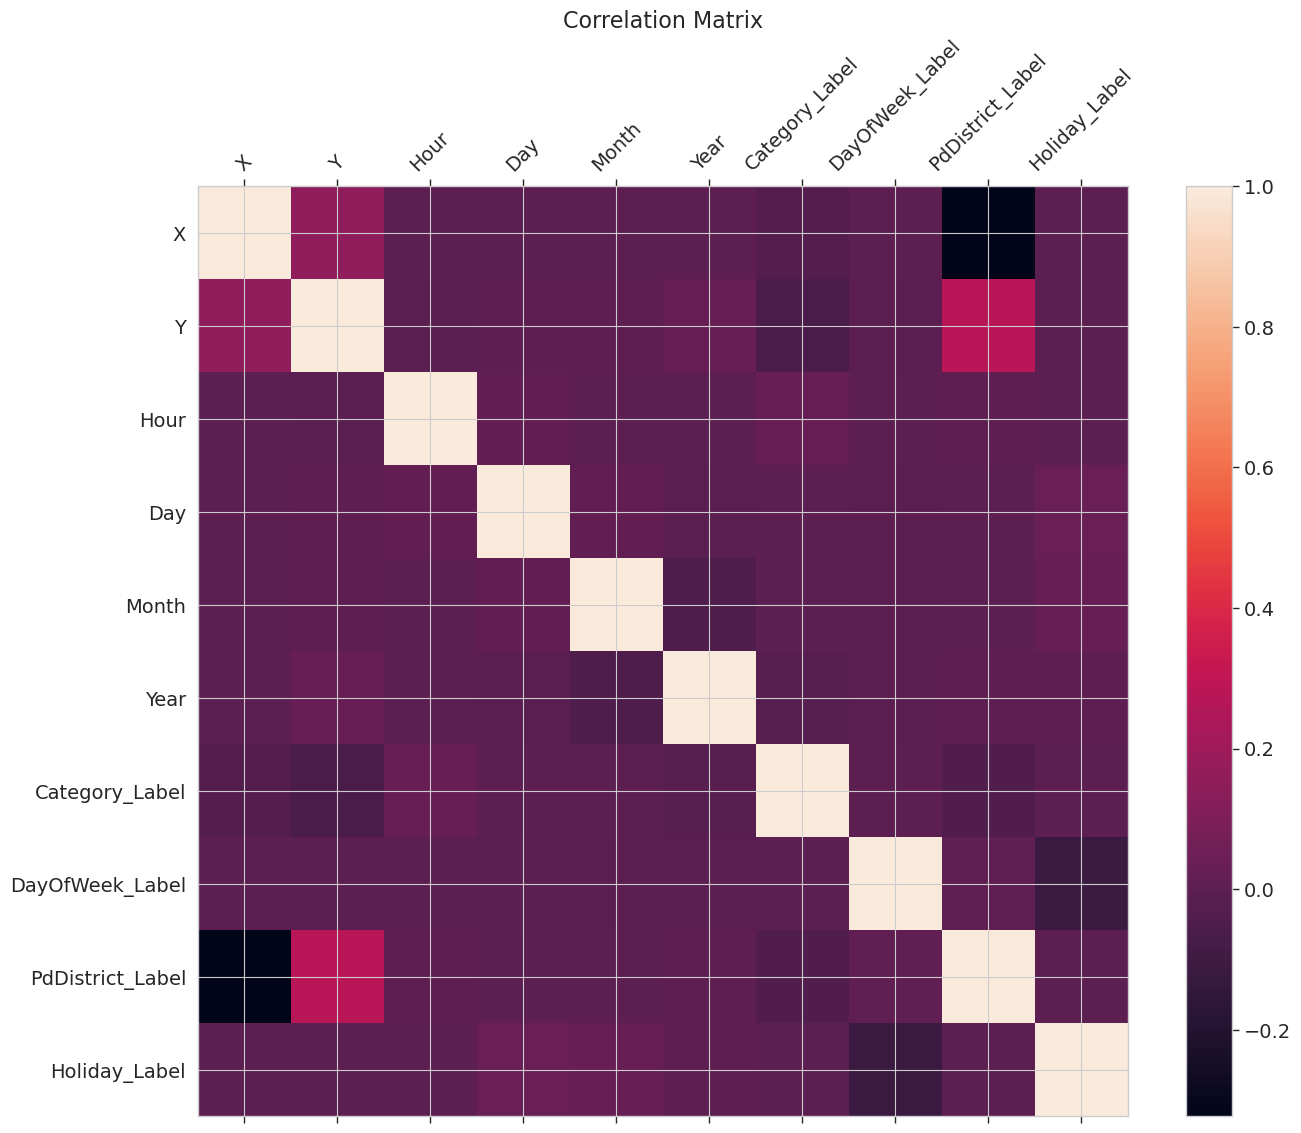

In [ ]:
# Let's see if the correlation of our numerical features has changed:
f = plt.figure(figsize=(15, 12))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# Separate the data for training (while extracting the test part from the train file):

# Import the function of splitting the data into training and test


from sklearn.model_selection import train_test_split

# Divide data into features and target

X = df_train.drop(columns='Category_Label')
y = df_train['Category_Label']

# Divide data into training and test (stratified by target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
X_train.head()

X          Y  Hour  Dау  Month  Year  DayOfWeek_Label  \
212410 -122.457441  37.709843    14   14      7  2012                2   
361727 -122.458680  37.748155    16    5      5  2010                6   
824918 -122.416230  37.763634    22   17      9  2003                6   
838481 -122.403366  37.789945    15   11      7  2003                0   
835508 -122.416262  37.785375    23   25      7  2003                0   

        PdDistrict_Label  Holiday_Label  
212410                 8              0  
361727                 5              0  
824918                 3              0  
838481                 1              0  
835508                 9              0

In [ ]:
# A function that calculates the metrics for the models used:

def model_result(model):
    train_acc = model.score(X_train, y_train)
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    test_acc = model.score(X_test, y_test)
    test_loss = log_loss(y_test, model.predict_proba(X_test))
    print(f'{model} train_score = {train_acc}')
    print(f'{model} log_loss = {train_loss}')
    print(f'{model} test_score = {test_acc}') 
    print(f'{model} test_log_loss = {test_loss}')
     
    return print()

In [ ]:
# We will use the SF Land Use dataset

!wget https://data.sfgov.org/api/views/a2rp-pwkh/rows.csv?accessType=DOWNLOAD -O LandUse.csv

--2023-03-30 20:27:29--  https://data.sfgov.org/api/views/a2rp-pwkh/rows.csv?accessType=DOWNLOAD
Resolving data.sfgov.org (data.sfgov.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.sfgov.org (data.sfgov.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘LandUse.csv’

LandUse.csv             [         <=>        ]  80.39M  5.24MB/s    in 16s     

2023-03-30 20:27:45 (5.04 MB/s) - ‘LandUse.csv’ saved [84293987]



In [ ]:
# Load the San Francisco land assignment data


land_use = pd.read_csv('./LandUse.csv')
land_use.dropna(inplace=True)

# Clean them up

mask = (land_use['LANDUSE'] == 'MISSING DATA') | (land_use['LANDUSE'] == 'Right of Way') 
lu = land_use[~mask]
land_cat = lu['LANDUSE'].unique()

print('Plots of land in San Francisco are divided into the following categories:\n', land_cat) 

Plots of land in San Francisco are divided into the following categories:
 ['RESIDENT' 'MIXRES' 'PDR' 'OpenSpace' 'VISITOR' 'MIPS' 'MIXED'
 'RETAIL/ENT' 'VACANT' 'CIE' 'MED']


interpretation:

CIE -- Cultural heritage sites, educational and government institutions

MED -- Medical facilities

MIPS -- Offices, business centers

MIXED -- Mixed type (no living areas)

MIXRES -- Mixed type (including residential areas)

PDR -- Industrial facilities (production, distribution, repair)

RETAIL/ENT -- Trade, entertainment

RESIDENT -- Residential areas

VISITOR -- Hotels, hostels

VACANT -- Unused infrastructure space

OPENSPACE -- Unoccupied space available to the public (green areas, etc.) where construction is specifically regulated

In [ ]:
# Find the centroids of the land plots

mp_data = lu['the_geom']
mp_geo = mp_data.apply(wkt.loads)
centroids = gpd.GeoSeries(mp_geo).centroid

# Create a list with centroid coordinates

coords = list(zip(centroids.x, centroids.y))

In [ ]:
lu['LANDUSE'].shape

(149734,)

In [ ]:
# Create a dataframe with the data we are interested in

lu_df = pd.DataFrame(coords, columns=['Land_X', 'Land_Y'])
lu_df = pd.concat((lu_df, lu['LANDUSE']), axis=1)

# Remove NaN values

lu_df.dropna(inplace=True)
lu_df.head()

Land_X     Land_Y   LANDUSE
0 -122.421167  37.804953  RESIDENT
1 -122.421259  37.804941    MIXRES
2 -122.421343  37.804932  RESIDENT
3 -122.421460  37.804849  RESIDENT
4 -122.421653  37.804825  RESIDENT

In [ ]:
from scipy.spatial import cKDTree
# Function that adds parcel data

def nearest_land(df1, df2, land_coords_cols=['Land_X', 'Land_Y'], 
                 coords_cols=['X', 'Y'], land_use_col='LANDUSE'): 
                 
    """
     df1 -- DataFrame, a dataframe containing the coordinates of the land
     df2 -- DataFrame, dataframe containing incident coordinates
     land_coords_cols -- list, column names of land coordinates
     coords_cols -- list, names of crime coordinate columns
     land_coords_cols -- str, name of the land category column 
    """
    
   # Create two dataframes with coordinates of sites and incidents, respectively
    
    df1_sub = df1[land_coords_cols]
    df2_sub = df2[coords_cols]
    
 # Remember the coordinates of land

    tree = cKDTree(df1_sub)
    
# By submitting the coordinates of the incidents, we find out the indices of the nearest plots of land

    distances, indices = tree.query(df2_sub)
    
# Save indexes of found land plots

    nearest_neighbors = df2.iloc[indices, :].copy(deep=True)

   # Create a dataframe with coordinates and type of destination of the land
     # for each incident. Reset indexing.

    land_types = df1.iloc[indices].copy(deep=True)
    land_types = land_types.reset_index(drop=True)
    
    df2 = df2.reset_index(drop=True)
    
    print(df2.shape)
    print(land_types.shape)
    
  # Add the newly created features to the training data

    df2_new = pd.concat((df2, land_types), axis=1)
    
  # Encode land categories with dummies

    land_dum = pd.get_dummies(df2_new[land_use_col])
    
   # Replace the column with land categories with dummy columns

    df2_land = pd.concat(((df2_new.drop(columns=[land_use_col])), land_dum), axis=1)
    print(df2_land.shape)
    return df2_land

In [ ]:
df_train_land = nearest_land(lu_df, df_train)

(875659, 10)
(875659, 3)
(875659, 23)


In [ ]:
# LightGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [ ]:
#  learning LightGBM:

clf.fit(X_train, y_train)
print(model_result(clf))

LGBMClassifier() train_score = 0.2625066557034918
LGBMClassifier() log_loss = 4.825626805865255
LGBMClassifier() test_score = 0.2531290683598657
LGBMClassifier() test_log_loss = 5.065502131621995

None


In [ ]:
# What metrics would we like to see on task classification?

from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
# Let's look at the metrics classification
# Do not forget that we have a multiclass. Let's look at the metrics for the one against all strategy (average=None)
print("TRAIN")
y_pred = clf.predict(X_train)
print(f"accuracy:  {accuracy_score(y_train, y_pred)}")
print(f"precision: {precision_score(y_train, y_pred, average=None)}")
print(f"recall:    {recall_score(y_train, y_pred, average=None)}")
print("TEST")
y_pred = clf.predict(X_test)
print(f"accuracy:  {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred, average=None)}")
print(f"recall:    {recall_score(y_test, y_pred, average=None)}")

TRAIN
accuracy:  0.2625066557034918
precision: [0.14191961 0.17683227 0.11340206 0.02795031 0.1114183  0.21603656
 0.12313003 0.31924206 0.12392755 0.11111111 0.04100946 0.15533981
 0.23599405 0.13156553 0.01923077 0.10443864 0.29193448 0.16255443
 0.18331806 0.48799841 0.2351099  0.20875212 0.         0.47588803
 0.20335196 0.08126195 0.23864456 0.07692308 0.17675781 0.02068966
 0.0962406  0.09043928 0.07224731 0.         0.21231979 0.12445981
 0.23595999 0.09098101 0.12611012]
recall:    [0.14297521 0.0585038  0.13538462 0.03896104 0.01376413 0.15076834
 0.05898567 0.42105019 0.03798948 0.15896885 0.06341463 0.16410256
 0.05617182 0.01938392 0.03418803 0.04273504 0.71233613 0.14746544
 0.20703934 0.23959094 0.10822941 0.3203446  0.         0.67920094
 0.0726257  0.00924415 0.21848185 0.01478141 0.05167    0.07627119
 0.01763571 0.0862069  0.00828256 0.         0.05534677 0.01615074
 0.18779244 0.01023466 0.02076023]
TEST
accuracy:  0.2531290683598657
precision: [0.01801802 0.16676442

In [ ]:
# Let's look at the importance of features (feature_importances_) in the classification model and analyze the top features
sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: -x[1])

[('X', 26550),
 ('Y', 25567),
 ('Hour', 16061),
 ('Dау', 14664),
 ('Year', 12756),
 ('Month', 9115),
 ('DayOfWeek_Label', 8313),
 ('PdDistrict_Label', 2982),
 ('Holiday_Label', 992)]

In [ ]:
# Useful function for splitting columns on date, time, etc.

def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (
        data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute

    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

Build the Final Model

In [ ]:
!pip uninstall lightgbm -y
!pip install lightgbm==2.2.3

Found existing installation: lightgbm 3.3.2
Uninstalling lightgbm-3.3.2:
  Successfully uninstalled lightgbm-3.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00ta 0:00:01


In [ ]:
# Imported LightGBM

import lightgbm as lgb

lgb.__version__

'3.3.2'

In [ ]:
# Upload the required files:

train = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip', parse_dates=['Dates'])
test = pd.read_csv("/kaggle/input/sf-crime/test.csv.zip", parse_dates=['Dates'], index_col='Id')

# We clean the data:

train.drop_duplicates(inplace=True)
train.drop(train[(train.Y > 50)].index)
test.drop(test[(test.Y > 50)].index)

# Let's use our service function to add date columns and new features

train = feature_engineering(train)
train.drop(columns=['Descript','Resolution'], inplace=True)
test = feature_engineering(test)

# We code categorical columns:

le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])

le2 = LabelEncoder()
X = train.drop(columns=['Category'])
y= le2.fit_transform(train['Category'])

In [ ]:
train.head()

Category  DayOfWeek  PdDistrict           X          Y  n_days  Day  \
0        WARRANTS          2           4 -122.425892  37.774599    4510   13   
1  OTHER OFFENSES          2           4 -122.425892  37.774599    4510   13   
2  OTHER OFFENSES          2           4 -122.424363  37.800414    4510   13   
3   LARCENY/THEFT          2           4 -122.426995  37.800873    4510   13   
4   LARCENY/THEFT          2           5 -122.438738  37.771541    4510   13   

   Month  Year  Hour  Minute  
0      5  2015    23      53  
1      5  2015    23      53  
2      5  2015    23      33  
3      5  2015    23      30  
4      5  2015    23      30

In [ ]:
df_train = nearest_land(lu_df, train)
df_train.head()

(875726, 11)
(875726, 3)
(875726, 24)


Category  DayOfWeek  PdDistrict           X          Y  n_days  Day  \
0        WARRANTS          2           4 -122.425892  37.774599    4510   13   
1  OTHER OFFENSES          2           4 -122.425892  37.774599    4510   13   
2  OTHER OFFENSES          2           4 -122.424363  37.800414    4510   13   
3   LARCENY/THEFT          2           4 -122.426995  37.800873    4510   13   
4   LARCENY/THEFT          2           5 -122.438738  37.771541    4510   13   

   Month  Year  Hour  ...  MED  MIPS  MIXED  MIXRES  OpenSpace  PDR  RESIDENT  \
0      5  2015    23  ...    0     1      0       0          0    0         0   
1      5  2015    23  ...    0     1      0       0          0    0         0   
2      5  2015    23  ...    0     0      0       0          0    0         1   
3      5  2015    23  ...    0     0      0       1          0    0         0   
4      5  2015    23  ...    1     0      0       0          0    0         0   

   RETAIL/ENT  VACANT  VISITOR  
0           0       0        0  
1           0       0        0  
2           0       0        0  
3           0       0        0  
4           0       0        0  

[5 rows x 24 columns]

In [ ]:
# Let's split the data on the sign and the target
X = df_train.drop(columns='Category')
y = df_train['Category']

# Divide the data into training and test (as before with stratification by target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(656794, 23) (656794,)
(218932, 23) (218932,)


In [ ]:
# Create instances of LGBMClassifier boosting classifier classes and train it on the training part of the dataset
booster1 = lgb.LGBMClassifier(objective="multiclass", n_estimators=100, num_class=39, 
                              max_delta_step=0.9,
                              min_data_in_leaf=21,
                              learning_rate=0.4,
                             )
booster1.fit(X_train, y_train, eval_set=[(X_test, y_test),], )

print("Test  Accuracy: %.2f"%booster1.score(X_test, y_test))
print("Train Accuracy: %.2f"%booster1.score(X_train, y_train))

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[1]	valid_0's multi_logloss: 2.5659
[2]	valid_0's multi_logloss: 2.49859
[3]	valid_0's multi_logloss: 2.45726
[4]	valid_0's multi_logloss: 2.42683
[5]	valid_0's multi_logloss: 2.40669
[6]	valid_0's multi_logloss: 2.39199
[7]	valid_0's multi_logloss: 2.37787
[8]	valid_0's multi_logloss: 2.36795
[9]	valid_0's multi_logloss: 2.35948
[10]	valid_0's multi_logloss: 2.35227
[11]	valid_0's multi_logloss: 2.34725
[12]	valid_0's multi_logloss: 2.34338
[13]	valid_0's multi_logloss: 2.33943
[14]	valid_0's multi_logloss: 2.33638
[15]	valid_0's multi_logloss: 2.33313
[16]	valid_0's multi_logloss: 2.33007
[17]	valid_0's multi_logloss: 2.32826
[18]	valid_0's multi_logloss: 2.32674
[19]	valid_0's multi_logloss: 2.32491
[20]	valid_0's multi_logloss: 2.32288
[21]	valid_0's multi_logloss: 2.32181
[22]	valid_0's multi_logloss: 2.32038
[23]	valid_0's multi_logloss: 2.3192
[24]	valid_0's 

In [ ]:
import joblib

# Saving model
# joblib.dump(booster1, 'lgb_fin.pkl')

!wget https://www.dropbox.com/s/jqfncd3z33xdvei/lgb_fin.pkl?dl=0 -O lgb_fin.pkl
# Load the model

bst = joblib.load('lgb_fin.pkl')

--2023-03-30 20:46:18--  https://www.dropbox.com/s/jqfncd3z33xdvei/lgb_fin.pkl?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jqfncd3z33xdvei/lgb_fin.pkl [following]
--2023-03-30 20:46:18--  https://www.dropbox.com/s/raw/jqfncd3z33xdvei/lgb_fin.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc88c77770b28e14e6867dc2731d.dl.dropboxusercontent.com/cd/0/inline/B5Oqeo815VsBvR2CSGVdgLF2WqmSIP8twCWOsZrOpb7OqLwK7E98D2YLBEbWBXvMyT2jWgagXhTYlQZeYBRiQ-dsF93_CDXSOG9gmIMg3nqhuAkscyIrmoxCi4SqC9CuA3IsewjYmwubrF9hNoZUY4TwupUs5q6Gni22UgdHsXcwrA/file# [following]
--2023-03-30 20:46:19--  https://uc88c77770b28e14e6867dc2731d.dl.dropboxusercontent.com/cd/0/inline/B5Oqeo815VsBvR2CSGVdgLF2WqmSIP8twCWOsZrOpb7OqLwK7E98D2YLBEbWBXvMyT2jWgagXhTYlQ

In [ ]:
print("Importance of features in LGBM:") 
sorted(zip(X_train.columns, booster1.feature_importances_), key=lambda x: -x[1])

Importance of features in LGBM:


[('n_days', 17000),
 ('X', 12571),
 ('Y', 12456),
 ('Hour', 11628),
 ('Minute', 10898),
 ('Day', 10237),
 ('Land_Y', 9964),
 ('Land_X', 9766),
 ('Month', 6237),
 ('DayOfWeek', 5612),
 ('PdDistrict', 2660),
 ('RESIDENT', 983),
 ('MIXRES', 937),
 ('VACANT', 550),
 ('RETAIL/ENT', 518),
 ('MIXED', 488),
 ('PDR', 413),
 ('MIPS', 400),
 ('Year', 272),
 ('CIE', 231),
 ('OpenSpace', 203),
 ('VISITOR', 184),
 ('MED', 87)]

In [ ]:
# Comment to download file model
# booster1 = bst

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_score = booster1.predict_proba(X_test)

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

In [ ]:
macro_roc_auc_ovr

0.72757249218148

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [ ]:
from itertools import combinations

pair_list = list(combinations(np.unique(y), 2))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(218932, 39)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import roc_curve, auc

# save fpr, tpr, and roc_auc

fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculating micro curve ROC and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.91


In [ ]:
for i in range(39):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolation of all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(39):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # линейная интерполяция

# AUC is averaged and calculated
mean_tpr /= 39

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.73


In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.73


Kaggle does not know how to collapse such cells :-)

In [ ]:
# Let's see how LGBM did the job

# Get a classification report by passing real labels and predicted labels to classification_report
from sklearn.metrics import classification_report
print("TEST")
print(classification_report(y_test, booster1.predict(X_test)))

TEST
                             precision    recall  f1-score   support

                      ARSON       0.07      0.01      0.01       378
                    ASSAULT       0.21      0.13      0.16     19204
                 BAD CHECKS       0.00      0.00      0.00       101
                    BRIBERY       0.01      0.01      0.01        72
                   BURGLARY       0.22      0.04      0.07      9150
         DISORDERLY CONDUCT       0.13      0.04      0.06      1078
DRIVING UNDER THE INFLUENCE       0.09      0.01      0.02       567
              DRUG/NARCOTIC       0.35      0.44      0.39     13480
                DRUNKENNESS       0.07      0.01      0.01      1069
               EMBEZZLEMENT       0.11      0.01      0.02       291
                  EXTORTION       0.00      0.00      0.00        64
            FAMILY OFFENSES       0.12      0.06      0.08       122
     FORGERY/COUNTERFEITING       0.20      0.06      0.10      2648
                      FRAUD 

In [ ]:
print("TRAIN")
print(classification_report(y_train, booster1.predict(X_train)))

TRAIN
                             precision    recall  f1-score   support

                      ARSON       0.80      0.21      0.34      1134
                    ASSAULT       0.29      0.17      0.22     57611
                 BAD CHECKS       0.79      0.78      0.78       305
                    BRIBERY       0.47      0.84      0.60       217
                   BURGLARY       0.35      0.08      0.13     27450
         DISORDERLY CONDUCT       0.45      0.13      0.20      3235
DRIVING UNDER THE INFLUENCE       0.69      0.19      0.30      1701
              DRUG/NARCOTIC       0.39      0.48      0.43     40439
                DRUNKENNESS       0.54      0.07      0.13      3208
               EMBEZZLEMENT       0.83      0.25      0.39       873
                  EXTORTION       0.62      0.94      0.75       192
            FAMILY OFFENSES       0.74      0.68      0.71       366
     FORGERY/COUNTERFEITING       0.40      0.13      0.20      7944
                      FRAUD

In [ ]:
# Let's bring the data format in the test dataset to the model format

le = LabelEncoder()
test = nearest_land(lu_df, test)
test.info()

(884262, 10)
(884262, 3)
(884262, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DayOfWeek   884262 non-null  int64  
 1   PdDistrict  884262 non-null  int64  
 2   X           884262 non-null  float64
 3   Y           884262 non-null  float64
 4   n_days      884262 non-null  int64  
 5   Day         884262 non-null  int64  
 6   Month       884262 non-null  int64  
 7   Year        884262 non-null  int64  
 8   Hour        884262 non-null  int64  
 9   Minute      884262 non-null  int64  
 10  Land_X      884262 non-null  float64
 11  Land_Y      884262 non-null  float64
 12  CIE         884262 non-null  uint8  
 13  MED         884262 non-null  uint8  
 14  MIPS        884262 non-null  uint8  
 15  MIXED       884262 non-null  uint8  
 16  MIXRES      884262 non-null  uint8  
 17  OpenSpace   884262 non-null  uint8  
 18  PDR   

In [ ]:
X_train.columns.sort_values()

Index(['CIE', 'Day', 'DayOfWeek', 'Hour', 'Land_X', 'Land_Y', 'MED', 'MIPS',
       'MIXED', 'MIXRES', 'Minute', 'Month', 'OpenSpace', 'PDR', 'PdDistrict',
       'RESIDENT', 'RETAIL/ENT', 'VACANT', 'VISITOR', 'X', 'Y', 'Year',
       'n_days'],
      dtype='object')

In [ ]:
test.columns.sort_values()

Index(['CIE', 'Day', 'DayOfWeek', 'Hour', 'Land_X', 'Land_Y', 'MED', 'MIPS',
       'MIXED', 'MIXRES', 'Minute', 'Month', 'OpenSpace', 'PDR', 'PdDistrict',
       'RESIDENT', 'RETAIL/ENT', 'VACANT', 'VISITOR', 'X', 'Y', 'Year',
       'n_days'],
      dtype='object')

In [ ]:
X_train.head()

DayOfWeek  PdDistrict           X          Y  n_days  Day  Month  \
676386          1           0 -122.387571  37.760550    1002    4     10   
467015          6           1 -122.406978  37.789918    2099    5     10   
168657          0           4 -122.432116  37.780030    3696   18      2   
78667           1           0 -122.404490  37.765303    4131   29      4   
778441          6           1 -122.416826  37.804573     468   18      4   

        Year  Hour  Minute  ...  MED  MIPS  MIXED  MIXRES  OpenSpace  PDR  \
676386  2005    14      15  ...    0     0      0       0          0    0   
467015  2008    10       0  ...    0     0      0       0          0    0   
168657  2013    19      14  ...    0     0      0       1          0    0   
78667   2014     0       1  ...    0     0      0       0          0    0   
778441  2004    20      20  ...    0     0      0       0          0    0   

        RESIDENT  RETAIL/ENT  VACANT  VISITOR  
676386         1           0       0        0  
467015         1           0       0        0  
168657         0           0       0        0  
78667          1           0       0        0  
778441         1           0       0        0  

[5 rows x 23 columns]

In [ ]:
# Bring the order of the columns in the test dataset to the order of the trained model

cols = list(X_train.columns)
test = pd.DataFrame(test, columns=cols)
test.head()

DayOfWeek  PdDistrict           X          Y  n_days  Day  Month  Year  \
0          6           0 -122.399588  37.735051    4512   10      5  2015   
1          6           0 -122.391523  37.732432    4512   10      5  2015   
2          6           4 -122.426002  37.792212    4512   10      5  2015   
3          6           2 -122.437394  37.721412    4512   10      5  2015   
4          6           2 -122.437394  37.721412    4512   10      5  2015   

   Hour  Minute  ...  MED  MIPS  MIXED  MIXRES  OpenSpace  PDR  RESIDENT  \
0    23      59  ...    0     0      0       0          0    0         1   
1    23      51  ...    0     0      0       1          0    0         0   
2    23      50  ...    0     0      0       0          0    0         1   
3    23      45  ...    0     0      0       0          0    0         1   
4    23      45  ...    0     0      0       0          0    0         1   

   RETAIL/ENT  VACANT  VISITOR  
0           0       0        0  
1           0       0        0  
2           0       0        0  
3           0       0        0  
4           0       0        0  

[5 rows x 23 columns]

In [ ]:
print(X_train.shape, test.shape)

(656794, 23) (884262, 23)


In [ ]:
# Get the values of predicted classes
preds_class = booster1.predict(test)

In [ ]:
# Get predicted probabilities - probabilities for each class
preds_proba = booster1.predict_proba(test)

In [ ]:
preds_proba.shape

(884262, 39)

In [ ]:
# Save the test dataset to the variable submission
submission = pd.DataFrame(
    preds_proba, 
    columns = le2.inverse_transform(np.linspace(0, 38, 39, dtype='int16')),
    index = test.index)
submission.head()

ARSON   ASSAULT    BAD CHECKS       BRIBERY  BURGLARY  \
0  0.000264  0.177703  4.024566e-08  1.610429e-07  0.002435   
1  0.000568  0.065204  7.301668e-10  1.779518e-05  0.003224   
2  0.009250  0.365858  2.065878e-08  3.007535e-07  0.010649   
3  0.000449  0.176320  1.619994e-07  1.644604e-04  0.003702   
4  0.000449  0.176320  1.619994e-07  1.644604e-04  0.003702   

   DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
0            0.000439                     0.006615       0.016347   
1            0.000262                     0.075011       0.038715   
2            0.001257                     0.002103       0.010327   
3            0.000524                     0.002661       0.007739   
4            0.000524                     0.002661       0.007739   

   DRUNKENNESS  EMBEZZLEMENT  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
0     0.003713  3.272942e-04  ...               2.819493e-10         0.006201   
1     0.003049  1.247387e-05  ...               2.716890e-09         0.011049   
2     0.002758  1.078039e-05  ...               3.241266e-11         0.000543   
3     0.006110  4.120602e-07  ...               1.242357e-09         0.001605   
4     0.006110  4.120602e-07  ...               1.242357e-09         0.001605   

        SUICIDE  SUSPICIOUS OCC          TREA  TRESPASS  VANDALISM  \
0  6.594506e-07        0.041377  1.959485e-11  0.000310   0.015253   
1  1.240166e-06        0.032829  3.313161e-11  0.000339   0.016023   
2  7.795295e-06        0.022524  2.109293e-13  0.008128   0.060002   
3  3.666320e-05        0.020110  6.498449e-13  0.002589   0.028005   
4  3.666320e-05        0.020110  6.498449e-13  0.002589   0.028005   

   VEHICLE THEFT  WARRANTS  WEAPON LAWS  
0       0.103397  0.032255     0.059695  
1       0.010179  0.151445     0.004249  
2       0.012507  0.019178     0.000778  
3       0.237522  0.016971     0.069120  
4       0.237522  0.016971     0.069120  

[5 rows x 39 columns]

In [ ]:
# Save the test data set to the file "lgb_model_fin.csv"

submission.to_csv(
    'lgb_model_fin.csv', index_label='Id')